Multiple Linear Regression
==========================
"f(x) = b + w1X1 + w2X2 + ... + wnXn

w = [w1, w2, ..., wn]
b is a number
X = [X1, X2, ..., Xn]
=> f(x) = b + w.X, where w and X are vectors and '.' represents dot product

Prepare Data

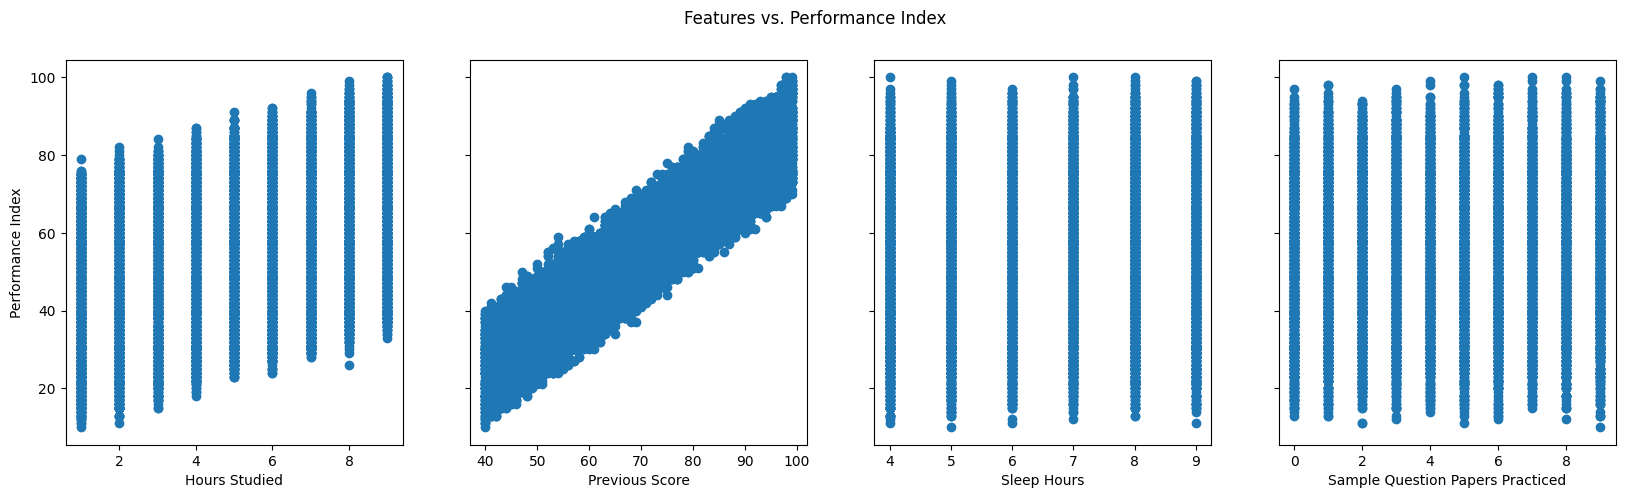

In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load csv data
data = np.genfromtxt('../Student_Performance.csv', delimiter=',', skip_header=1)

# drop rows with missing values
data = data[~np.isnan(data).any(axis=1)]

# split data into X and y
X = data[:, :-1]
y = data[:, -1]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_labels = ['Hours Studied', 'Previous Score', 'Sleep Hours', 'Sample Question Papers Practiced']
# plot each feature against y
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_train_labels[i])
ax[0].set_ylabel('Performance Index')
fig.suptitle('Features vs. Performance Index')
plt.show()

Cost Function
=============
J(w, b) = 1/2m * sum((f(x) - y)^2)

In [2]:
# def compute_cost(X, y, w, b):
#     m = X.shape[0]
#     cost = 0.0
#     for i in range(m):
#         f_wb_i = np.dot(X[i], w) + b
#         cost = cost + (f_wb_i - y[i]) ** 2
#     cost = cost / (2 * m)
#     return cost

def compute_cost(X, y, w, b):
    """
    Computes the cost function for linear regression.

    Parameters:
    X (numpy.ndarray): Feature dataset.
    y (numpy.ndarray): Target values.
    w (numpy.ndarray): Weights.
    b (float): Bias.

    Returns:
    float: The cost value.
    """
    m = X.shape[0]
    f_wb = X @ w + b
    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return cost

Gradient Descent
================
w = w - alpha * dJ(w, b)/dw
b = b - alpha * dJ(w, b)/db

where dJ(w, b)/dw = 1/m * sum((f(x) - y) * x)
and dJ(w, b)/db = 1/m * sum(f(x) - y)

In [8]:
# def compute_gradient(X, y, w, b):
#     m, n = X.shape
#     dj_dw = np.zeros((n,))
#     dj_db = 0.
# 
#     for i in range(m):
#         err = (np.dot(X[i], w) + b) - y[i]
#         for j in range(n):
#             dj_dw[j] = dj_dw[j] + err * X[i, j]
#         dj_db = dj_db + err
#     dj_dw = dj_dw / m
#     dj_db = dj_db / m
#     return dj_db, dj_dw
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression.

    Parameters:
    X (numpy.ndarray): Feature dataset.
    y (numpy.ndarray): Target values.
    w (numpy.ndarray): Weights.
    b (float): Bias.

    Returns:
    tuple: Gradients with respect to the bias and weights.
    """
    m, n = X.shape
    f_wb = X @ w + b
    err = f_wb - y
    dj_dw = (X.T @ err) / m
    dj_db = np.sum(err) / m

    return dj_db, dj_dw


# def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
#     # An array to store cost J and w's at each iteration primarily for graphing later
#     J_history = []
#     w = copy.deepcopy(w_in)  # avoid modifying global w within function
#     b = b_in
# 
#     for i in range(num_iters):
#         dj_db, dj_dw = gradient_function(X, y, w, b)
#         w = w - alpha * dj_dw
#         b = b - alpha * dj_db
# 
#         # Save cost J at each iteration
#         if i < 100000:  # prevent resource exhaustion 
#             J_history.append(cost_function(X, y, w, b))
# 
#     return w, b, J_history
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs gradient descent to learn w and b.

    Parameters:
    X (numpy.ndarray): Feature dataset.
    y (numpy.ndarray): Target values.
    w_in (numpy.ndarray): Initial weights.
    b_in (float): Initial bias.
    cost_function (function): Function to compute the cost.
    gradient_function (function): Function to compute the gradients.
    alpha (float): Learning rate.
    num_iters (int): Number of iterations.

    Returns:
    tuple: Updated weights, bias, and history of cost values.
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            J_history.append(cost_function(X, y, w, b))
            
    return w, b, J_history

Test with Test Data
=======

w: [ 0.64470287  0.7847001  -0.16835938 -0.07145702]
b: -0.037879279618572216
Time taken: 1.0253992080688477 seconds


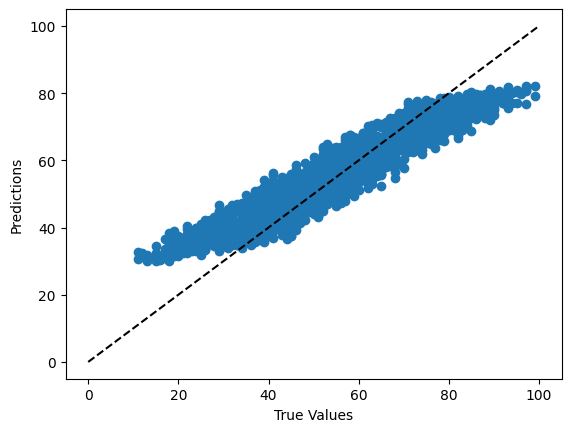

Cost on test data: 28.142801710032103


In [4]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0

# play around with iterations and alpha
iterations = 500
alpha = 0.0001

start = time.time()
w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                   iterations)
end = time.time()

print(f'w: {w}')
print(f'b: {b}')
print(f'Time taken: {end - start} seconds')

y_pred = np.dot(X_test, w) + b

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# calculate cost on test data
cost = compute_cost(X_test, y_test, w, b)
print(f'Cost on test data: {cost}')

P.S: some libraries use the "normal equation" to solve for w and b. The normal equation is a closed-form solution that directly computes the parameters that minimize the cost function.

The normal equation is:
w = (X^T.X)^-1.X^T.y

where:
- X is the feature matrix
- y is the target values
- w is the parameter vector

incorporating the bias term:
X = [1, X], where 1 is a column of ones

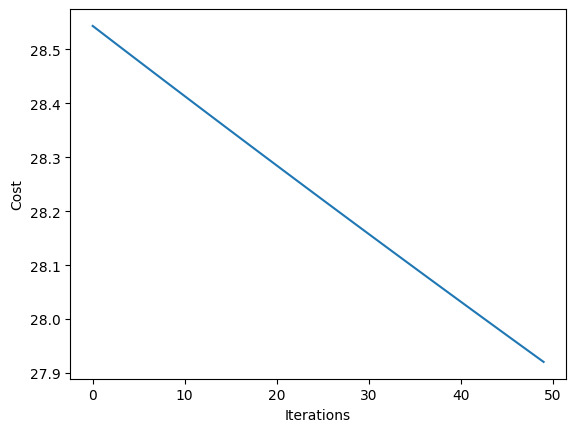

In [5]:
# plot cost vs. iterations for last 50 iterations
plt.plot(J_history[-50:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Note that the cost is still decreasing. We will explore more on this later.

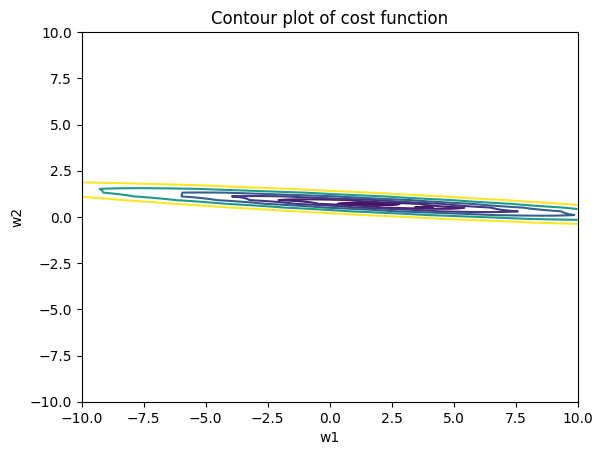

In [6]:
# plot contour plot of cost function, for the first two features
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)

J_vals = np.zeros((len(w1_vals), len(w2_vals)))
for i, w1 in enumerate(w1_vals):
    for j, w2 in enumerate(w2_vals):
        w = np.array([w1, w2])
        J_vals[i, j] = compute_cost(X_train[:, :2], y_train, w, b)
        
plt.contour(w1_vals, w2_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour plot of cost function')
plt.show()

Notice how narrow the contour plot is. This is because the features have different ranges.
We will address this in the next section.

Using Normal Equation
=====================

w_normal: [2.85289351 1.01703572 0.47331832 0.19172629]
b_normal: -33.60206732749307


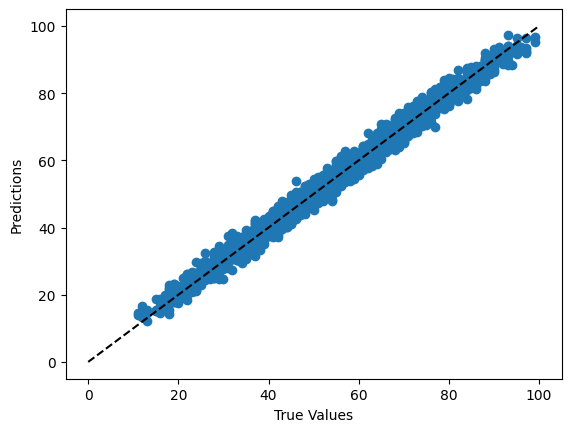

Cost on test data (normal equation): 2.0911274572968837


In [15]:
def normal_equation(X, y):
    """
    Computes the parameters for linear regression using the normal equation.

    Parameters:
    X (numpy.ndarray): Feature dataset.
    y (numpy.ndarray): Target values.

    Returns:
    tuple: Weights and bias.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # add column of ones for bias term
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return w[1:], w[0]

# calculate w and b using normal equation
w_normal, b_normal = normal_equation(X_train, y_train)

print(f'w_normal: {w_normal}')
print(f'b_normal: {b_normal}')

# predict on test data
y_pred_normal = np.dot(X_test, w_normal) + b_normal

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred_normal)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# calculate cost on test data
cost_normal = compute_cost(X_test, y_test, w_normal, b_normal)
print(f'Cost on test data (normal equation): {cost_normal}')

Notice that the predictions are closer to the line x=y
and the cost is much less compared to gradient descent.

NOTE: The closed-form solution does not require normalization.
NOTE2: Computing the inverse of a matrix is computationally expensive for large datasets.

Feature Scaling
===============
When the possible values of features differ by orders of magnitude (e.g., one feature ranges from 0 to 1 and another ranges from 1 to 1000), it is likely that the 'w' values will also differ by orders of magnitude.
The contour plot of the cost function will be narrow on the side of the feature with the larger range and wider on the side of the feature with the smaller range.
In this case, the algorithm will take longer to converge.

To address this, we can normalize the features to have similar ranges.
Then, the contour plot of the cost function will be more symmetric and the algorithm will converge faster.

Normalization approaches:
1. divide by maximum: x = x / max  OR  x = (x - min) / (max - min)
2. mean normalization: x = (x - mean) / (max - min)     ----> -1 <= x <= 1
3. z-score normalization: x = (x - mean) / std      ----> mean = 0, std = 1

mean = 1/m * sum(x)
std = sqrt(1/m * sum(x - mean)^2)

As a rule of thumb, aim for -1 <= x <= 1

Note: when in doubt, rescale the features.

In [25]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

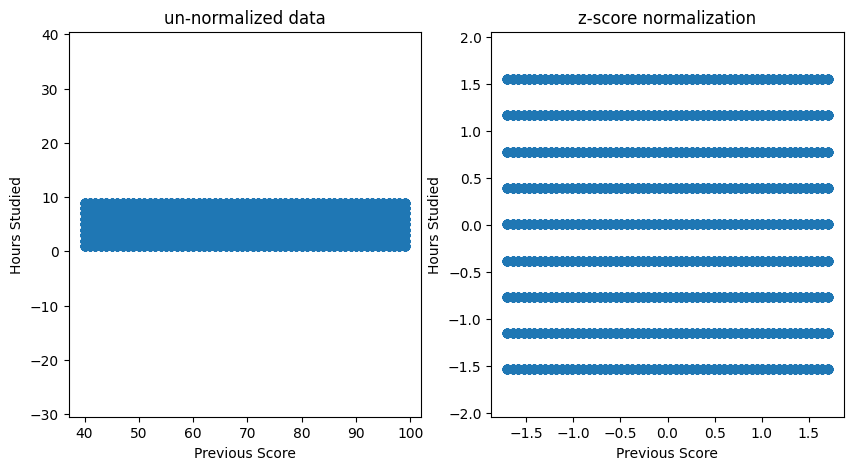

In [18]:
# perform scaling
X_train_norm, mu, sigma = z_score_normalization(X_train)

# plot the first and second features
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_train[:, 1], X_train[:, 0])
ax[0].set_xlabel(X_train_labels[1]); ax[0].set_ylabel(X_train_labels[0])
ax[0].set_title('un-normalized data')
ax[0].axis('equal')

ax[1].scatter(X_train_norm[:, 1], X_train_norm[:, 0])
ax[1].set_xlabel(X_train_labels[1]); ax[1].set_ylabel(X_train_labels[0])
ax[1].set_title('z-score normalization')
ax[1].axis('equal')

plt.show()

In [19]:
print(f'mu: {mu}')
print(f'sigma: {sigma}')

mu: [ 4.98325  69.531     6.541625  4.6165  ]
sigma: [ 2.59470026 17.34265086  1.69838669  2.86106235]


In [20]:
# re-run gradient descent with normalized features
initial_w = np.zeros(X_train_norm.shape[1])
initial_b = 0

iterations = 500
alpha = 0.1     # alpha = 0.1 is a good start for normalized features

start = time.time()
w, b, J_history = gradient_descent(X_train_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                   iterations)
end = time.time()

print(f'w: {w}')
print(f'b: {b}')
print(f'Time taken: {end - start} seconds')

w: [ 7.40240354 17.63809533  0.80387754  0.54854088]
b: 55.311499999999974
Time taken: 0.3387718200683594 seconds


Notice how faster our algorithm converges.

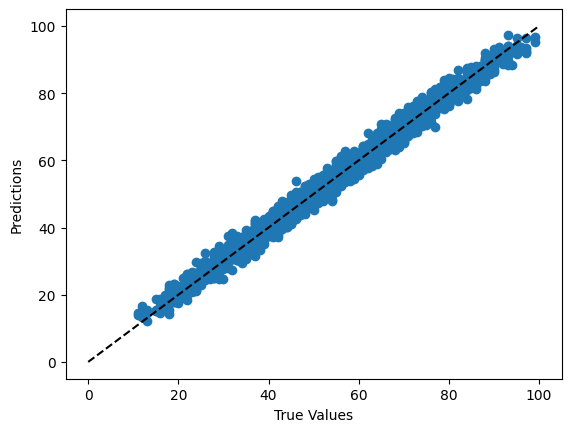

In [21]:
# predict on test data
X_test_norm = (X_test - mu) / sigma
y_pred = np.dot(X_test_norm, w) + b

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Notice that the predictions are closer to the line x=y!

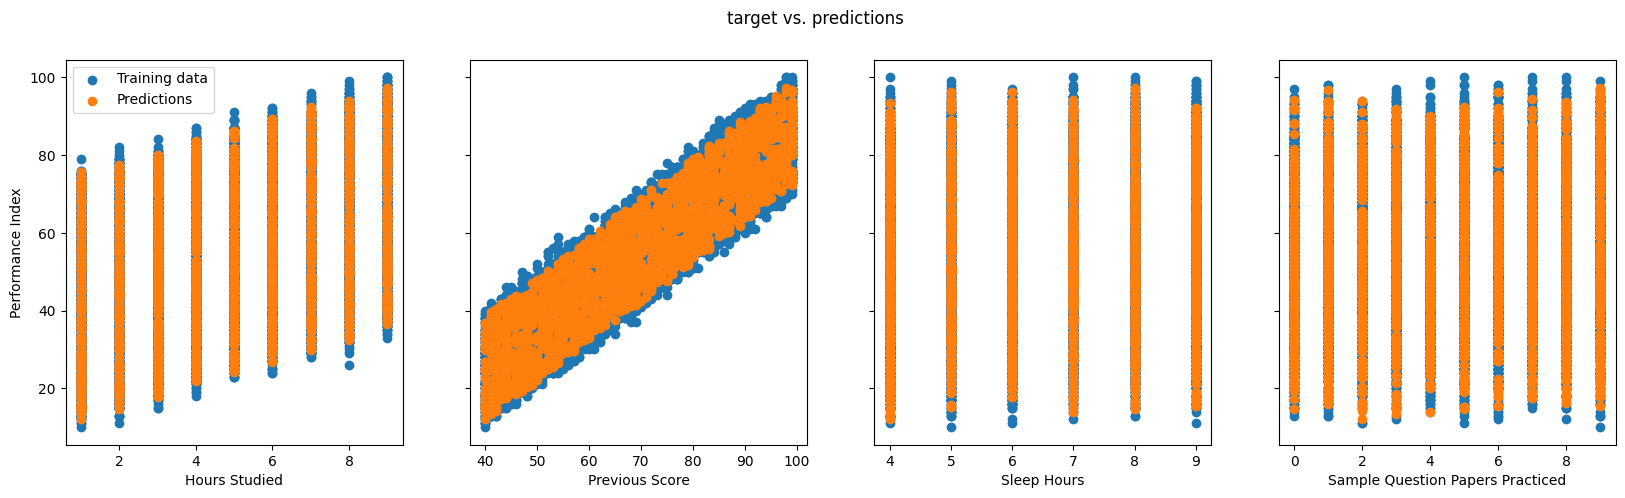

In [22]:
# plot predictions and targets vs. features
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Training data')
    ax[i].set_xlabel(X_train_labels[i])
    # predictions
    ax[i].scatter(X_test[:,i], y_pred, label='Predictions')
ax[0].set_ylabel('Performance Index')
ax[0].legend()
fig.suptitle('target vs. predictions')
plt.show()

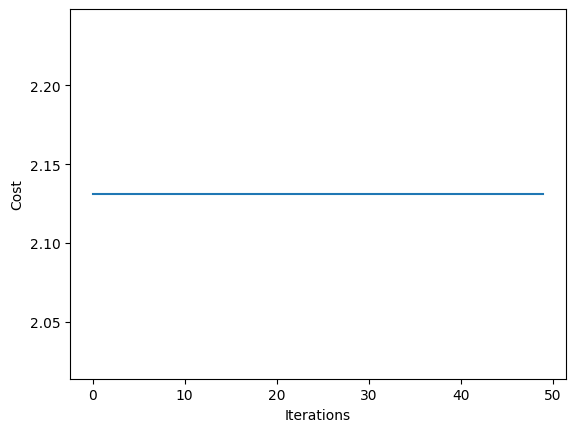

Cost on test data: 2.0911274572969076


In [24]:
# Plot cost function in the last 50 iterations
plt.plot(J_history[-50:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
print(f'Cost on test data: {compute_cost(X_test_norm, y_test, w, b)}')

Notice that the cost is much less than before (with unnormalized data). This is because the features are normalized.

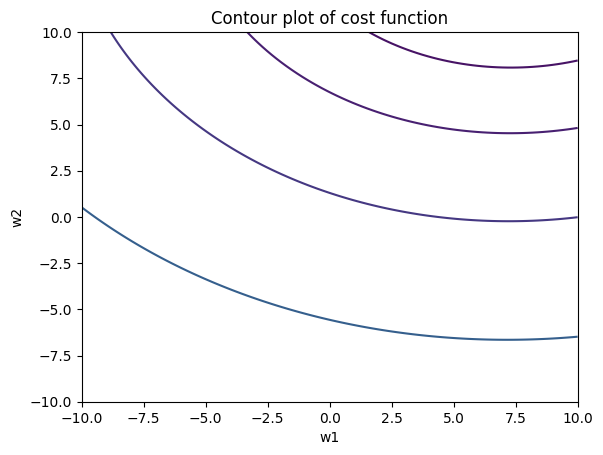

In [25]:
# plot contour plot of cost function, for the first two features
# we can see that the contour plot is more symmetric
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)

J_vals = np.zeros((len(w1_vals), len(w2_vals)))
for i, w1 in enumerate(w1_vals):
    for j, w2 in enumerate(w2_vals):
        w = np.array([w1, w2])
        J_vals[i, j] = compute_cost(X_train_norm[:, :2], y_train, w, b)
        
plt.contour(w1_vals, w2_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour plot of cost function')
plt.show()

Now the plot is more symmetric, and the algorithm converges faster.

Choosing alpha and checking convergence
=======================================
We can use the cost function to determine if the algorithm has converged.
The cost function - or learning curve - should decrease with each iteration.
If the cost function is not decreasing, we may need to adjust the learning rate alpha.

Another way to check for convergence is to set a threshold for the difference in cost between iterations.
If the difference is less than the threshold, the algorithm has converged.

You can start with an initial value of alpha, and then triple it each time.
By plotting the cost function, you can choose the largest possible alpha that still converges.

Feature Engineering
===================
Feature engineering is the process of creating new features from existing features.
This can help improve the performance of the model.

For example, we might have a dataset of frontage and depth of houses and want to predict the price.
We can create a new feature called area by multiplying frontage and depth.

Polynomial Regression
=====================
The combination of feature engineering and multiple linear regression is called polynomial regression.
The relationship between the features and the target is not always linear.
We can add polynomial terms to the features to capture non-linear relationships.

f(x) = b + w1X1 + w2X2 + w3X1^2 + w4X2^2 + w5X1X2 + ...
It is worth mentioning that feature scaling is even more important in polynomial regression.

You may also use the square root of features, log of features, etc.

(100, 1)
(100,)


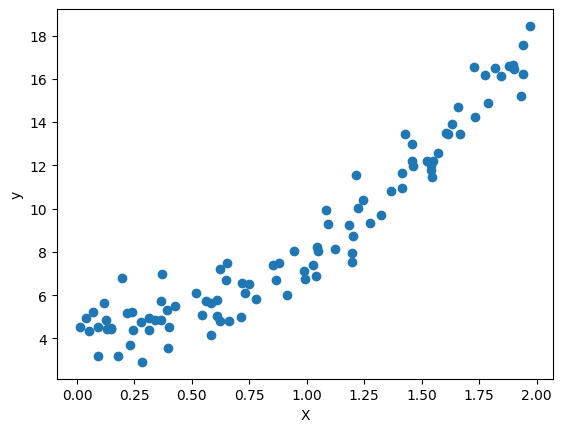

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# generate random data, in the form of a parabola
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + X + 3 * X**2 + np.random.randn(100, 1)
y = y.reshape(-1)

print(X.shape)
print(y.shape)


plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

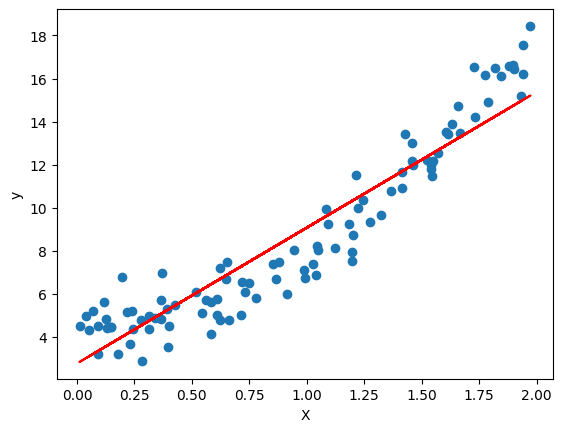

In [18]:
# try the gradient descent algorithm
w = np.zeros(X.shape[1])
b = 0
w, b, J_history = gradient_descent(X, y, w, b, compute_cost, compute_gradient, 0.001, 10000)

# plot the curve over the data
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can see that the line is not fitting the data well.

w: [0.19601613 3.0046164  0.1662985 ]
b: 4.44230616627214


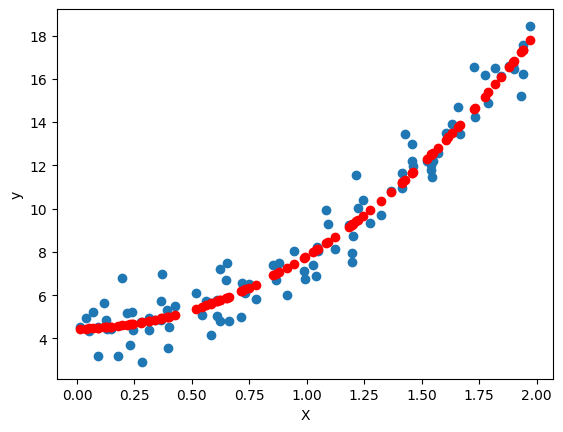

In [34]:
# let's try polynomial regression and feature engineering
X_poly = np.c_[X, X**2, X**3]
w = np.zeros(X_poly.shape[1])
b = 0

w, b, J_history = gradient_descent(X_poly, y, w, b, compute_cost, compute_gradient, 0.001, 500000)

print(f'w: {w}')
print(f'b: {b}')

# plot the curve over the data
plt.scatter(X, y)
plt.scatter(X, w[0]*X + w[1]*X**2 + w[2]*X**3 + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can see that the value for w1 is larger than the others,
 meaning that gradient descent is picking the 'correct' feature by emphasizing its parameter.

Thus, the polynomial feature was chosen based on how well it fits the data.

w: [0.17926424 3.35597664 0.52828834]
b: 8.643499705947352


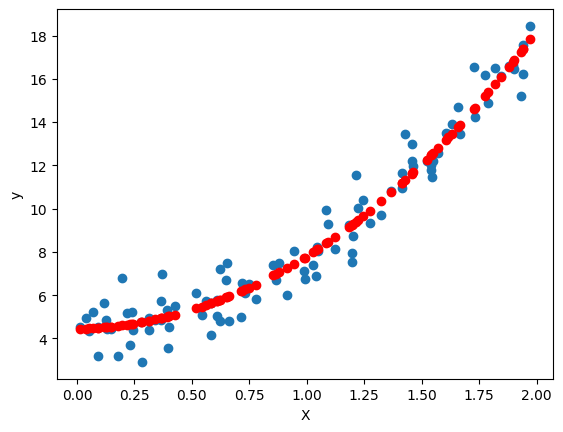

In [36]:
# let's not forget to normalize the features
X_poly_norm, mu, sigma = z_score_normalization(X_poly)

w = np.zeros(X_poly_norm.shape[1])
b = 0

w, b, J_history = gradient_descent(X_poly_norm, y, w, b, compute_cost, compute_gradient, 0.001, 500000)

print(f'w: {w}')
print(f'b: {b}')

# plot the curve over the data
plt.scatter(X, y)
X_poly_predict = (np.c_[X, X**2, X**3] - mu) / sigma
y_predict = X_poly_predict.dot(w) + b
plt.scatter(X, y_predict, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can use linear regression to model even more complex functions.

w: [-0.76496567 -1.69684094  1.2538119   2.198443    1.68650722  0.66513788
 -0.30957013 -0.99947007 -1.34305872 -1.36153735 -1.10779979 -0.64146851
 -0.01790147  0.71579606  1.52146137]
b: 0.1741628295577869


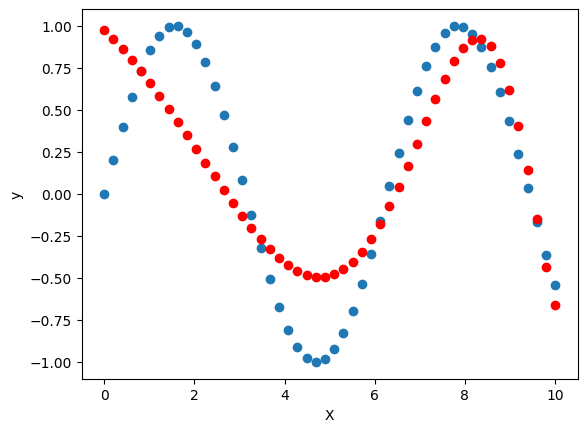

In [42]:
# sin function
X = np.linspace(0, 10, 50)
y = np.sin(X)

X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13, X**14, X**15]
X_poly_norm, mu, sigma = z_score_normalization(X_poly)
w = np.zeros(X_poly.shape[1])
b = 0

w, b, J_history = gradient_descent(X_poly_norm, y, w, b, compute_cost, compute_gradient, 0.001, 500000)

print(f'w: {w}')
print(f'b: {b}')

# plot the curve over the data
plt.scatter(X, y)
X_poly_predict = (X_poly - mu) / sigma
y_predict = X_poly_predict.dot(w) + b
plt.scatter(X, y_predict, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Sci-kit Learn
=============
sklearn.linear_model.SGDRegressor: implements a linear regression model using stochastic gradient descent.
                                    Works best when data is normalized.
sklearn.preprocessing.StandardScaler: z-score normalization.
sklearn.linear_model.LinearRegression: implements a linear regression model using the normal equation.

we will explore both methods below.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler


# load csv data
data = np.genfromtxt('../Student_Performance.csv', delimiter=',', skip_header=1)

# drop rows with missing values
data = data[~np.isnan(data).any(axis=1)]

# split data into X and y
X = data[:, :-1]
y = data[:, -1]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_labels = ['Hours Studied', 'Previous Score', 'Sleep Hours', 'Sample Question Papers Practiced']

In [45]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
print(f'peak to peak range by feature in raw data: {np.ptp(X_train, axis=0)}')
print(f'peak to peak range by feature in normalized data: {np.ptp(X_train_norm, axis=0)}')

peak to peak range by feature in raw data: [ 8. 59.  5.  9.]
peak to peak range by feature in normalized data: [3.08320777 3.4020174  2.94397031 3.14568468]


In [46]:
# fit the model
model = SGDRegressor(max_iter=1000)
model.fit(X_train_norm, y_train)
print(model)

SGDRegressor()


In [47]:
w_norm = model.coef_
b_norm = model.intercept_
print(f'w: {w_norm}')
print(f'b: {b_norm}')

w: [ 7.37207492 17.65896023  0.75849182  0.53294649]
b: [55.33138091]


the previous weights found above are:
    w: [ 7.40240354 17.63809533  0.80387754  0.54854088]
    b: 55.311499999999974
Well done!

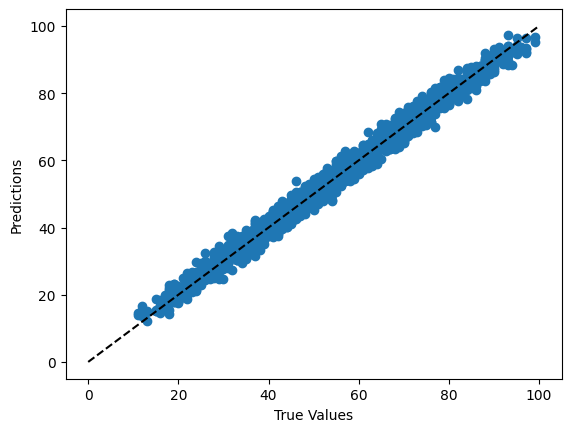

In [48]:
# predict on test data
X_test_norm = scaler.transform(X_test)
y_pred = model.predict(X_test_norm)

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
# X must be 2D
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [55]:
w_normal = model.coef_
b_normal = model.intercept_
print(f'w: {w_normal}')
print(f'b: {b_normal}')

w: [2.85289351 1.01703572 0.47331832 0.19172629]
b: -33.6020673274929


the previous weights found above are:
    w_normal: [2.85289351 1.01703572 0.47331832 0.19172629]
    b_normal: -33.60206732749307

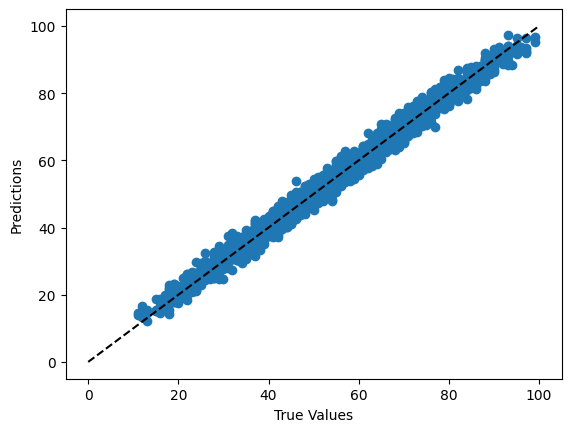

In [56]:
# predict on test data
y_pred_normal = model.predict(X_test)

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred_normal)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()